In [1]:
# pip install opencv-python
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from tqdm import tqdm,tqdm_notebook
import pickle
import os
from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score
import seaborn as sns
import cv2
from collections import Counter
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
from keras import applications
from tensorflow.keras.utils import img_to_array, array_to_img,load_img
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers,Model,Sequential
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation,Flatten
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import load_model
from keras.layers import BatchNormalization
from keras.layers import concatenate
from keras.layers import GlobalMaxPooling2D
import tensorflow as kf

In [2]:
os.chdir("C:/Users/akhil/Desktop/B. Disease Grading/B. Disease Grading/1. Original Images/a. Training Set")

In [3]:
l = os.listdir()
l

['IDRiD_001.jpg',
 'IDRiD_002.jpg',
 'IDRiD_003.jpg',
 'IDRiD_004.jpg',
 'IDRiD_005.jpg',
 'IDRiD_006.jpg',
 'IDRiD_007.jpg',
 'IDRiD_008.jpg',
 'IDRiD_009.jpg',
 'IDRiD_010.jpg',
 'IDRiD_011.jpg',
 'IDRiD_012.jpg',
 'IDRiD_013.jpg',
 'IDRiD_014.jpg',
 'IDRiD_015.jpg',
 'IDRiD_016.jpg',
 'IDRiD_017.jpg',
 'IDRiD_018.jpg',
 'IDRiD_019.jpg',
 'IDRiD_020.jpg',
 'IDRiD_021.jpg',
 'IDRiD_022.jpg',
 'IDRiD_023.jpg',
 'IDRiD_024.jpg',
 'IDRiD_025.jpg',
 'IDRiD_026.jpg',
 'IDRiD_027.jpg',
 'IDRiD_028.jpg',
 'IDRiD_029.jpg',
 'IDRiD_030.jpg',
 'IDRiD_031.jpg',
 'IDRiD_032.jpg',
 'IDRiD_033.jpg',
 'IDRiD_034.jpg',
 'IDRiD_035.jpg',
 'IDRiD_036.jpg',
 'IDRiD_037.jpg',
 'IDRiD_038.jpg',
 'IDRiD_039.jpg',
 'IDRiD_040.jpg',
 'IDRiD_041.jpg',
 'IDRiD_042.jpg',
 'IDRiD_043.jpg',
 'IDRiD_044.jpg',
 'IDRiD_045.jpg',
 'IDRiD_046.jpg',
 'IDRiD_047.jpg',
 'IDRiD_048.jpg',
 'IDRiD_049.jpg',
 'IDRiD_050.jpg',
 'IDRiD_051.jpg',
 'IDRiD_052.jpg',
 'IDRiD_053.jpg',
 'IDRiD_054.jpg',
 'IDRiD_055.jpg',
 'IDRiD_05

In [4]:
for i in l:
    try:
        img = cv2.imread(i)
        image_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit = 5)
        final_img = clahe.apply(image_bw) + 30
        _, ordinary_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)
        contours, hierarchy = cv2.findContours(ordinary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        largest_contour = max(contours, key=cv2.contourArea)
        M = cv2.moments(largest_contour)
        x = int(M['m10'] / M['m00'])
        y = int(M['m01'] / M['m00'])



        if x < img.shape[1] / 2:
            flip_code = 1  
        else:
            flip_code = 0  

        if flip_code == 1:
            img = cv2.flip(img, 1)
            image_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            clahe = cv2.createCLAHE(clipLimit = 5)
            final_img = clahe.apply(image_bw) + 30
            _, ordinary_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)
            contours, hierarchy = cv2.findContours(ordinary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            largest_contour = max(contours, key=cv2.contourArea)
            M = cv2.moments(largest_contour)
            x = int(M['m10'] / M['m00'])
            y = int(M['m01'] / M['m00'])

        # Define the radius of the Field-1 circle in pixels
        field1_radius = 500

        mask = np.zeros(img.shape[:2], dtype=np.uint8)
        cv2.circle(mask, (x-200,y) ,field1_radius, 255, -1)



        masked_img = cv2.bitwise_and(img, img, mask=mask)
        masked_img = cv2.resize(masked_img,(224,224))
        cv2.imwrite(r'C:\Users\akhil\Desktop\DR\training/'+i,masked_img)
    except:
        print(i)

IDRiD_018.jpg
IDRiD_019.jpg
IDRiD_030.jpg
IDRiD_031.jpg
IDRiD_052.jpg
IDRiD_124.jpg
IDRiD_136.jpg
IDRiD_137.jpg
IDRiD_148.jpg
IDRiD_149.jpg
IDRiD_153.jpg
IDRiD_160.jpg
IDRiD_274.jpg
IDRiD_278.jpg
IDRiD_337.jpg


In [5]:
os.chdir('../')

In [6]:
os.chdir('b. Testing Set')

In [7]:
p = os.listdir()
p

['IDRiD_001.jpg',
 'IDRiD_002.jpg',
 'IDRiD_003.jpg',
 'IDRiD_004.jpg',
 'IDRiD_005.jpg',
 'IDRiD_006.jpg',
 'IDRiD_007.jpg',
 'IDRiD_008.jpg',
 'IDRiD_009.jpg',
 'IDRiD_010.jpg',
 'IDRiD_011.jpg',
 'IDRiD_012.jpg',
 'IDRiD_013.jpg',
 'IDRiD_014.jpg',
 'IDRiD_015.jpg',
 'IDRiD_016.jpg',
 'IDRiD_017.jpg',
 'IDRiD_018.jpg',
 'IDRiD_019.jpg',
 'IDRiD_020.jpg',
 'IDRiD_021.jpg',
 'IDRiD_022.jpg',
 'IDRiD_023.jpg',
 'IDRiD_024.jpg',
 'IDRiD_025.jpg',
 'IDRiD_026.jpg',
 'IDRiD_027.jpg',
 'IDRiD_028.jpg',
 'IDRiD_029.jpg',
 'IDRiD_030.jpg',
 'IDRiD_031.jpg',
 'IDRiD_032.jpg',
 'IDRiD_033.jpg',
 'IDRiD_034.jpg',
 'IDRiD_035.jpg',
 'IDRiD_036.jpg',
 'IDRiD_037.jpg',
 'IDRiD_038.jpg',
 'IDRiD_039.jpg',
 'IDRiD_040.jpg',
 'IDRiD_041.jpg',
 'IDRiD_042.jpg',
 'IDRiD_043.jpg',
 'IDRiD_044.jpg',
 'IDRiD_045.jpg',
 'IDRiD_046.jpg',
 'IDRiD_047.jpg',
 'IDRiD_048.jpg',
 'IDRiD_049.jpg',
 'IDRiD_050.jpg',
 'IDRiD_051.jpg',
 'IDRiD_052.jpg',
 'IDRiD_053.jpg',
 'IDRiD_054.jpg',
 'IDRiD_055.jpg',
 'IDRiD_05

In [8]:
for i in p:
    try:
        img = cv2.imread(i)
        image_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit = 5)
        final_img = clahe.apply(image_bw) + 30
        _, ordinary_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)
        contours, hierarchy = cv2.findContours(ordinary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        largest_contour = max(contours, key=cv2.contourArea)
        M = cv2.moments(largest_contour)
        x = int(M['m10'] / M['m00'])
        y = int(M['m01'] / M['m00'])



        if x < img.shape[1] / 2:
            flip_code = 1  
        else:
            flip_code = 0  

        if flip_code == 1:
            img = cv2.flip(img, 1)
            image_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            clahe = cv2.createCLAHE(clipLimit = 5)
            final_img = clahe.apply(image_bw) + 30
            _, ordinary_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)
            contours, hierarchy = cv2.findContours(ordinary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            largest_contour = max(contours, key=cv2.contourArea)
            M = cv2.moments(largest_contour)
            x = int(M['m10'] / M['m00'])
            y = int(M['m01'] / M['m00'])

        # Define the radius of the Field-1 circle in pixels
        field1_radius = 500

        mask = np.zeros(img.shape[:2], dtype=np.uint8)
        cv2.circle(mask, (x-200,y) ,field1_radius, 255, -1)

        masked_img = cv2.bitwise_and(img, img, mask=mask)
        masked_img = cv2.resize(masked_img,(224,224))
        cv2.imwrite(r'C:\Users\akhil\Desktop\DR\testing/'+i,masked_img)
    except:
        print(i)

IDRiD_001.jpg
IDRiD_003.jpg
IDRiD_024.jpg
IDRiD_067.jpg


In [9]:
os.chdir('C:/Users/akhil/Desktop/DR/training')

In [10]:
l = os.listdir()
l

['IDRiD_001.jpg',
 'IDRiD_002.jpg',
 'IDRiD_003.jpg',
 'IDRiD_004.jpg',
 'IDRiD_005.jpg',
 'IDRiD_006.jpg',
 'IDRiD_007.jpg',
 'IDRiD_008.jpg',
 'IDRiD_009.jpg',
 'IDRiD_010.jpg',
 'IDRiD_011.jpg',
 'IDRiD_012.jpg',
 'IDRiD_013.jpg',
 'IDRiD_014.jpg',
 'IDRiD_015.jpg',
 'IDRiD_016.jpg',
 'IDRiD_017.jpg',
 'IDRiD_020.jpg',
 'IDRiD_021.jpg',
 'IDRiD_022.jpg',
 'IDRiD_023.jpg',
 'IDRiD_024.jpg',
 'IDRiD_025.jpg',
 'IDRiD_026.jpg',
 'IDRiD_027.jpg',
 'IDRiD_028.jpg',
 'IDRiD_029.jpg',
 'IDRiD_032.jpg',
 'IDRiD_033.jpg',
 'IDRiD_034.jpg',
 'IDRiD_035.jpg',
 'IDRiD_036.jpg',
 'IDRiD_037.jpg',
 'IDRiD_038.jpg',
 'IDRiD_039.jpg',
 'IDRiD_040.jpg',
 'IDRiD_041.jpg',
 'IDRiD_042.jpg',
 'IDRiD_043.jpg',
 'IDRiD_044.jpg',
 'IDRiD_045.jpg',
 'IDRiD_046.jpg',
 'IDRiD_047.jpg',
 'IDRiD_048.jpg',
 'IDRiD_049.jpg',
 'IDRiD_050.jpg',
 'IDRiD_051.jpg',
 'IDRiD_053.jpg',
 'IDRiD_054.jpg',
 'IDRiD_055.jpg',
 'IDRiD_056.jpg',
 'IDRiD_057.jpg',
 'IDRiD_058.jpg',
 'IDRiD_059.jpg',
 'IDRiD_060.jpg',
 'IDRiD_06

In [11]:
df = pd.read_csv("C:/Users/akhil/Desktop/B. Disease Grading/B. Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv")
pf = pd.read_csv("C:/Users/akhil/Desktop/B. Disease Grading/B. Disease Grading/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv")

In [12]:
train = Counter()
test = Counter()

In [13]:
for col, row in df.iterrows():
    g = row[0]
    h = row[1]
    if h > 0:
        h = 1
    train[g] = h

In [14]:
for col, row in pf.iterrows():
    g = row[0]
    h = row[1]
    if h > 0:
        h = 1
    test[g] = h

In [15]:
print(len(train))
print(len(test))

413
103


In [16]:
t_df = pd.DataFrame(columns = ['path','DR'])


In [17]:
for i in l:
    i= i.split(".")[0]
    dr = train[i]
    t_df.loc[len(t_df.index)] = [i, dr]

In [18]:
l[0]

'IDRiD_001.jpg'

In [19]:
t_df

,path,DR
0,IDRiD_001,1
1,IDRiD_002,1
2,IDRiD_003,1
3,IDRiD_004,1
4,IDRiD_005,1
...,...,...
393,IDRiD_409,1
394,IDRiD_410,1
395,IDRiD_411,1
396,IDRiD_412,1


In [20]:
os.chdir('..//')

In [21]:
os.chdir('testing')

In [22]:
p= os.listdir()
t_pf = pd.DataFrame(columns = ['path','DR'])

In [23]:
for i in p:
    i= i.split(".")[0]
    dr = test[i]
    t_pf.loc[len(t_pf.index)] = [i, dr]

In [24]:
t_pf

,path,DR
0,IDRiD_002,1
1,IDRiD_004,1
2,IDRiD_005,1
3,IDRiD_006,1
4,IDRiD_007,1
...,...,...
94,IDRiD_099,0
95,IDRiD_100,1
96,IDRiD_101,1
97,IDRiD_102,1


In [25]:
os.chdir('C:/Users/akhil')

In [26]:
t_df.to_csv('DR_training.csv')

In [27]:
t_pf.to_csv('DR_testing.csv')

In [28]:
df = pd.read_csv('DR_training.csv')
pf = pd.read_csv('DR_testing.csv')

In [29]:
df = df.drop('Unnamed: 0', axis = 1)
pf = pf.drop('Unnamed: 0', axis = 1)

In [30]:
print(df.shape)
print(pf.shape)

(398, 2)
(99, 2)


In [31]:
def train(x):
    x = r'C:/Users/akhil/DR/training/' + x+'.jpg'
    return x

In [32]:
df['path'] = df['path'].apply(train)

In [33]:
def test(x):
    x = r'C:/Users/akhil/DR/testing/' + x+'.jpg'
    return x

In [34]:
df.columns

Index(['path', 'DR'], dtype='object')

In [35]:
pf['path'] = pf['path'].apply(test)

In [36]:
def str_r(x):
    x = str(x)
    return x

In [37]:
df['DR'] = df['DR'].apply(str_r)
pf['DR'] = pf['DR'].apply(str_r)

In [38]:
df['path'][0]

'C:/Users/akhil/DR/training/IDRiD_001.jpg'

In [39]:
pf['path'][0]

'C:/Users/akhil/DR/testing/IDRiD_002.jpg'

In [40]:
#generating images using image generator
BATCH_SIZE = 8
EPOCHS = 5
WARMUP_EPOCHS = 2
LEARNING_RATE = 1e-4
WARMUP_LEARNING_RATE = 1e-3
HEIGHT = 224
WIDTH = 224
CANAL = 3
N_CLASSES = df['DR'].nunique()
ES_PATIENCE = 5
RLROP_PATIENCE = 3
DECAY_DROP = 0.5
def img_generator(train,test):
    train_datagen=ImageDataGenerator(validation_split=0.2)
    
    train_generator=train_datagen.flow_from_dataframe(dataframe=df,
                                                      
                                                      x_col="path",
                                                      y_col="DR",
                                                      batch_size=BATCH_SIZE,
                                                      class_mode="binary",
                                                      target_size=(HEIGHT, WIDTH),
                                                      subset='training')
    
    valid_generator=train_datagen.flow_from_dataframe(dataframe=df,
                                                     
                                                      x_col="path",
                                                      y_col="DR",
                                                      batch_size=BATCH_SIZE,
                                                      class_mode="binary",    
                                                      target_size=(HEIGHT, WIDTH),
                                                      subset='validation')
    
    test_datagen = ImageDataGenerator()
    test_generator = test_datagen.flow_from_dataframe(dataframe=pf,
                                                      x_col="path",
                                                      target_size=(HEIGHT, WIDTH),
                                                      batch_size=1,
                                                      shuffle=False,
                                                      class_mode=None)
    
    return train_generator,valid_generator,test_generator

In [41]:
train_generator,valid_generator,test_generator = img_generator(df,pf)

Found 319 validated image filenames belonging to 2 classes.
Found 79 validated image filenames belonging to 2 classes.
Found 99 validated image filenames.


In [42]:
pf.shape

(99, 2)

In [43]:
resnet_model = Sequential()
pretrained_model= kf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='max',classes=2,
                   weights='imagenet')
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))
resnet_model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=kf.optimizers.Adam(),
              metrics=['accuracy'])
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24,637,313
Trainable params: 24,584,193
Non-trainable params: 53,120
_________________________________________________________________


In [44]:
resnet_model.fit(train_generator, batch_size = BATCH_SIZE, epochs = 20, verbose = 1, validation_data = valid_generator)
resnet_model.save('resnet.h5')

Epoch 1/20
40/40 [==============================] - 83s 2s/step - loss: 7.1640 - accuracy: 0.5956 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
40/40 [==============================] - 66s 2s/step - loss: 2.3245 - accuracy: 0.6019 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
40/40 [==============================] - 67s 2s/step - loss: 1.0532 - accuracy: 0.6677 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
40/40 [==============================] - 69s 2s/step - loss: 0.8898 - accuracy: 0.6646 - val_loss: 1027.3679 - val_accuracy: 0.0000e+00
Epoch 5/20
40/40 [==============================] - 68s 2s/step - loss: 0.8940 - accuracy: 0.6928 - val_loss: 95.0753 - val_accuracy: 0.0000e+00
Epoch 6/20
40/40 [==============================] - 70s 2s/step - loss: 0.7131 - accuracy: 0.6928 - val_loss: 1.2045 - val_accuracy: 0.5696
Epoch 7/20
40/40 [==============================] - 72s 2s/step - loss: 0.6562 - accuracy: 0.7147 - val_loss: 0.2341 - val_accuracy: 0.9

ResNet50 Accuracy score : 0.697


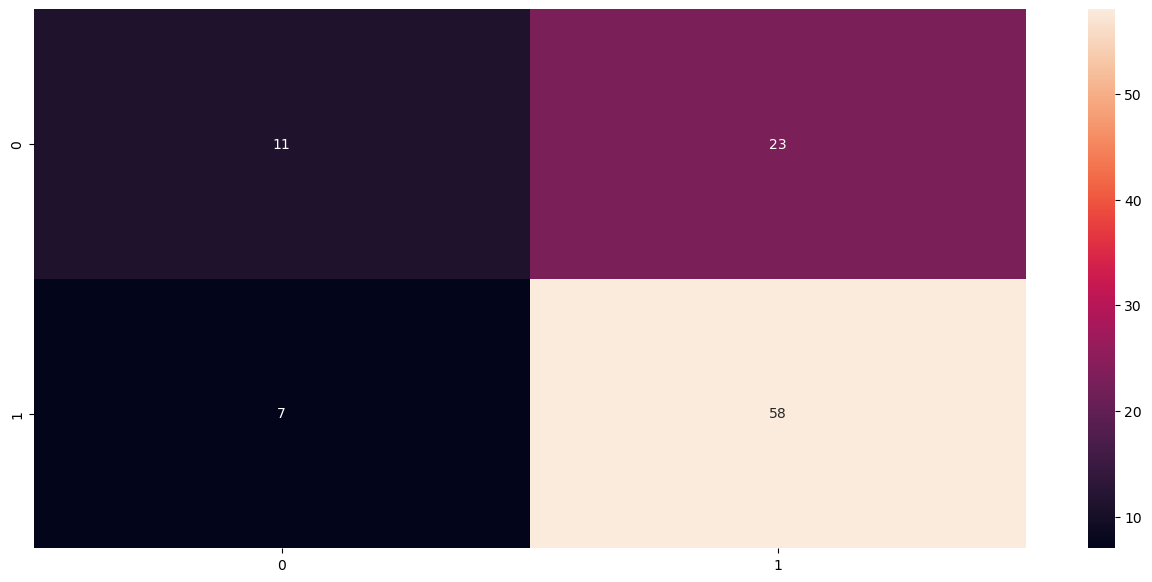

In [46]:
# Load the saved ResNet model
resnet_model = load_model('resnet.h5')
train_preds1 =resnet_model.predict_generator(test_generator)#predicting test data using ResNet50
y_pred1 =list()
for i in train_preds1:
    y_pred1.append(round(i[0]))
p=confusion_matrix(pf['DR'].astype("int"),y_pred1)
plt.figure(figsize=(16, 7))
sns.heatmap(p,annot=True)#ploting confusion matrix
print("ResNet50 Accuracy score : %.3f" % accuracy_score(pf['DR'].astype('int'),y_pred1))#finding accuracy'''

In [47]:
#inceptionV3
base_model = InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(224, 224,3))
base_model.trainable = False
add_model = Sequential()
add_model.add(base_model)
add_model.add(Flatten())
add_model.add(Dense(1024, 
                    activation='relu'))
add_model.add(Dropout(0.2))
add_model.add(Dense(1, 
                    activation='sigmoid'))
model = add_model
model.compile(loss='binary_crossentropy', 
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              52429824  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 74,233,633
Trainable params: 52,430,849
Non-trainable params: 21,802,784
_________________________________________________________________


In [49]:
model.fit(train_generator, batch_size = BATCH_SIZE, epochs = 20, verbose = 1, validation_data = valid_generator)
model.save('Inception.h5')

Epoch 1/20
40/40 [==============================] - 30s 661ms/step - loss: 110.8133 - accuracy: 0.5831 - val_loss: 0.8227 - val_accuracy: 0.9873
Epoch 2/20
40/40 [==============================] - 24s 604ms/step - loss: 48.1159 - accuracy: 0.6646 - val_loss: 10.7428 - val_accuracy: 0.8734
Epoch 3/20
40/40 [==============================] - 24s 594ms/step - loss: 42.0281 - accuracy: 0.7210 - val_loss: 3.1731 - val_accuracy: 0.9494
Epoch 4/20
40/40 [==============================] - 24s 606ms/step - loss: 17.0861 - accuracy: 0.7555 - val_loss: 20.3261 - val_accuracy: 0.5949
Epoch 5/20
40/40 [==============================] - 23s 582ms/step - loss: 9.9455 - accuracy: 0.7555 - val_loss: 16.0700 - val_accuracy: 0.4304
Epoch 6/20
40/40 [==============================] - 23s 584ms/step - loss: 10.2469 - accuracy: 0.7116 - val_loss: 12.8509 - val_accuracy: 0.3671
Epoch 7/20
40/40 [==============================] - 23s 583ms/step - loss: 2.9072 - accuracy: 0.8088 - val_loss: 0.3597 - val_accura

ResNet50 Accuracy score : 0.626


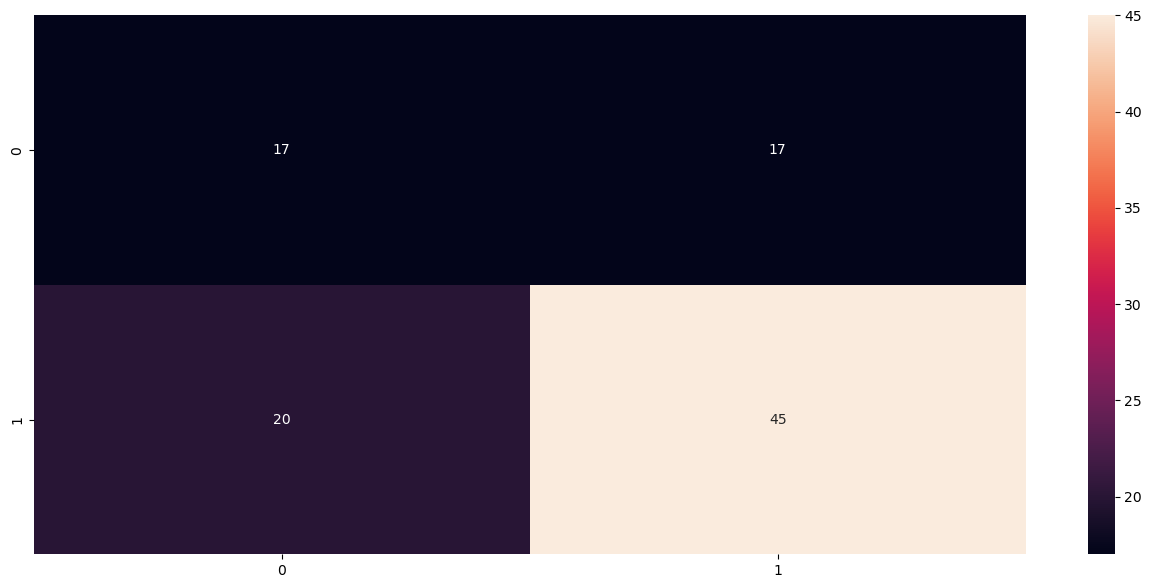

In [50]:
model = load_model('Inception.h5')
train_preds1 =model.predict_generator(test_generator)#predicting test data using ResNet50
y_pred1 =list()
for i in train_preds1:
    y_pred1.append(round(i[0]))
from sklearn.metrics import confusion_matrix, cohen_kappa_score,accuracy_score
p=confusion_matrix(pf['DR'].astype("int"),y_pred1)
import seaborn as sns
plt.figure(figsize=(16, 7))
sns.heatmap(p,annot=True)#ploting confusion matrix
print("Inception Accuracy score : %.3f" % accuracy_score(pf['DR'].astype('int'),y_pred1))#finding accuracy'''